# Analyzing Majors

Author: Andrea Mock

In this notebook we will focus on analyzing the different majors CS alums/alums who ended up in the tech industry are are distributed. We will thus first look at the absolute number of what majors people choose as well as the years they graduated from Wellesley to offer a better picture of the group of individuals we are looking at. 

In [1]:
import pandas as pd

In [21]:
alum_data = pd.read_csv('alum_data_anon.csv', index_col = 0)

In [1]:
# get a sense of our dataset 
#alum_data.head()

Text(0, 0.5, 'number of people')

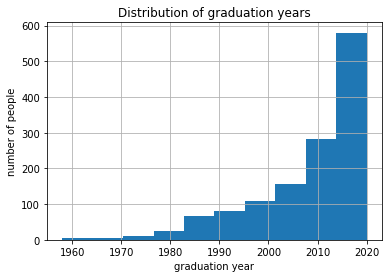

In [119]:
# histogram of graduation year
alum_data[alum_data['grad_year'] != -1].hist()
plt.title('Distribution of graduation years')
plt.xlabel('graduation year')
plt.ylabel('number of people')

In [35]:
from collections import Counter
# create a counter of occurences of different majors
majors1 = Counter(alum_data['major1'])
majors2 = Counter(alum_data['major2'])
majors3= Counter(alum_data['major3'])

In [38]:
counterAllMajors = majors2 + majors1 + majors3

In [43]:
# getting top 20 majors mentioned 
topMajors = counterAllMajors.most_common(21)[1:]

In [45]:
top_majors_df = pd.DataFrame(topMajors,columns=['major', 'count'])
top_majors_df.head() # visualization of the top words

,major,count
0,Computer Science,586
1,Economics,206
2,Math,119
3,English,80
4,Psychology,78


In [46]:
import matplotlib.pyplot as plt

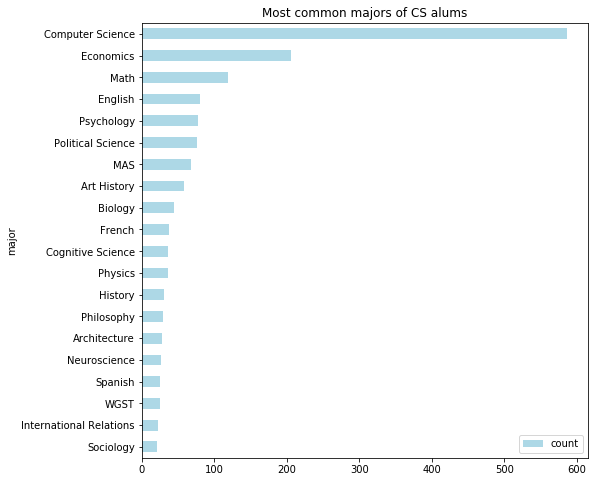

In [47]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
top_majors_df.sort_values(by='count').plot.barh(x='major',
                      y='count',
                      ax=ax,
                      color="lightblue")

ax.set_title("Most common majors of CS alums")

plt.show()

After having quantified the majors that occur the most we are also interested to see how many individuals have a second major as well as what the popular combinations are. As wellesley allows people to double major we thus consider the major1 and major2 columns together to look at the popular combinations.

In [50]:
majorCombo = list(zip(alum_data['major1'], alum_data['major2']))

In [51]:
# one possible first and second major in our dataset
majorCombo[0] 

('MAS', 'Computer Science')

In [124]:
majorCombos_df = pd.DataFrame(majorCombo)
majorCombos_df.columns = ['major1', 'major2']

In [130]:
def swapMajors(majors):
    """
    swaps the order of majors if the second major is computer science
    """
    if majors['major2'] == 'Computer Science':
        swap = majors[0];
        majors[0] = majors[1]
        majors[1] = swap
        return majors
        #return [majors[1], majors[0]]
    #return [majors[0], majors[1]]
    return majors

In [134]:
# swaps the order of majors
major_clean_df = majorCombos_df.apply(lambda x:swapMajors(x), axis = 1)

In [136]:
majorCombo_clean = list(zip(major_clean_df['major1'], major_clean_df['major2']))

In [138]:
Counter(majorCombo_clean).most_common(20) # counter of most popular major combos

[(('Computer Science', nan), 283),
 ((nan, nan), 70),
 (('Economics', nan), 68),
 (('Computer Science', 'Math'), 54),
 (('MAS', nan), 35),
 (('Computer Science', 'Economics'), 34),
 (('Political Science', nan), 31),
 (('Art History', nan), 27),
 (('Computer Science', 'Psychology'), 25),
 (('English', nan), 24),
 (('Psychology', nan), 24),
 (('Math', nan), 23),
 (('Biology', nan), 20),
 (('Physics', nan), 17),
 (('Computer Science', 'English'), 17),
 (('Economics', 'Math'), 14),
 (('Computer Science', 'Cognitive Science'), 14),
 (('Architecture', nan), 14),
 (('Environmental Studies', nan), 13),
 (('International Relations', nan), 12)]

In [139]:
# getting rid of nan values 
topCombos = [Counter(majorCombo_clean).most_common(20)[0]] + Counter(majorCombo_clean).most_common(20)[2:]

In [140]:
top_combos_df = pd.DataFrame(topCombos)
top_combos_df.columns = ['majors', 'count']
top_combos_df.head() # creating a dataframe that includes major combos and counts

,majors,count
0,"(Computer Science, nan)",283
1,"(Economics, nan)",68
2,"(Computer Science, Math)",54
3,"(MAS, nan)",35
4,"(Computer Science, Economics)",34


In [141]:
def cleanMajorPair(majorPair):
    if type(majorPair[1]) != str:
        majorPair = tuple([majorPair[0], '-'])
    return majorPair

In [142]:
top_combos_df['majors'] = top_combos_df['majors'].apply(lambda x: cleanMajorPair(x))

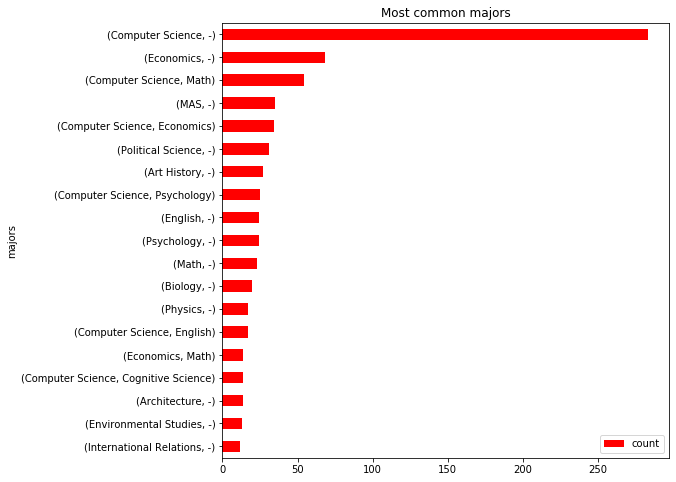

In [143]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
top_combos_df.sort_values(by='count').plot.barh(x='majors',
                      y='count',
                      ax=ax,
                      color="red")

ax.set_title("Most common majors")

plt.show()